In [2]:
import ollama

response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': 'What is in this image?',
        'images': ['tree.jpg']
    }]
)

print(response)

model='llama3.2-vision' created_at='2024-12-29T17:18:22.436290425Z' done=True done_reason='stop' total_duration=203761169735 load_duration=38090710497 prompt_eval_count=18 prompt_eval_duration=154838000000 eval_count=40 eval_duration=10091000000 message=Message(role='assistant', content='There appears to be a tree, and possibly some grass or other vegetation in the foreground. The sky has pink clouds that suggest sunrise or sunset. There may also be some fog on the horizon.', images=None, tool_calls=None)


In [3]:
response.message

Message(role='assistant', content='There appears to be a tree, and possibly some grass or other vegetation in the foreground. The sky has pink clouds that suggest sunrise or sunset. There may also be some fog on the horizon.', images=None, tool_calls=None)

In [4]:
response.message.content

'There appears to be a tree, and possibly some grass or other vegetation in the foreground. The sky has pink clouds that suggest sunrise or sunset. There may also be some fog on the horizon.'

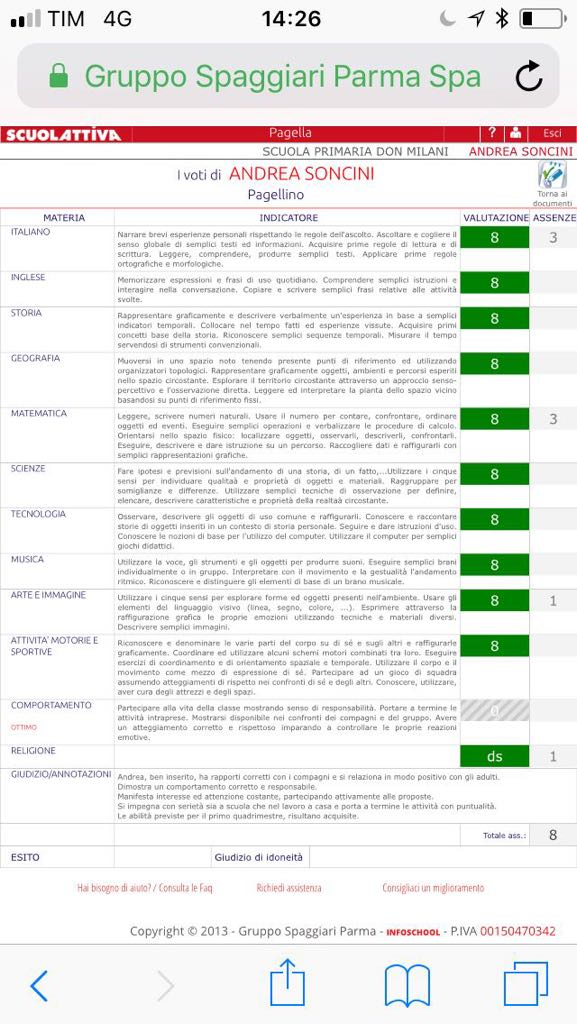

In [73]:
from PIL import Image
from IPython.display import display

img = Image.open('IMG-20180205-WA0002.jpg')
display(img)

In [7]:
import ollama

response = ollama.chat(
    model='llama3.2-vision',
    messages=[{
        'role': 'user',
        'content': 'What is in this image?',
        'images': ['IMG-20180205-WA0002.jpg']
    }]
)

print(response)

model='llama3.2-vision' created_at='2024-12-29T18:13:44.113491291Z' done=True done_reason='stop' total_duration=229528109637 load_duration=16644748810 prompt_eval_count=25 prompt_eval_duration=209347000000 eval_count=14 eval_duration=3235000000 message=Message(role='assistant', content='The votes are 8 for Music and 3 for Science.', images=None, tool_calls=None)


In [17]:
from typing import List

from pydantic import BaseModel

class Materia (BaseModel):
    nome: str
    valutazione: int
    assenze: int

class Pagella(BaseModel):
    nome_alunno: str
    materie: List[Materia]


In [18]:
prompt = """
You are a data visual parsing assistant. 
In the image there is a report card of an italian student.
Ratings are the ones in green boxes.
Your goal is to output its content as JSON.
"""

messages = [
    {"role": "system", "content": prompt,
     "images": ['IMG-20180205-WA0002.jpg']},
    
#    {"role": "user", "content": message},
  
]

response = ollama.chat(
    messages=messages,
    model='llama3.2-vision',
    # Enable structured ouput capability
    format=Pagella.model_json_schema(),
)

pagella = Pagella.model_validate_json(response.message.content)
print(pagella)

nome_alunno='ANDREA SONCINI' materie=[Materia(nome='MATERIA ITALIANO', valutazione=8, assenze=3), Materia(nome='INGLESE', valutazione=8, assenze=0), Materia(nome='STORIA', valutazione=8, assenze=0), Materia(nome='GEOGRAFIA', valutazione=8, assenze=0), Materia(nome='MATEMATICA', valutazione=8, assenze=3), Materia(nome='SCIENZE', valutazione=8, assenze=0), Materia(nome='TECNOLIGIA', valutazione=8, assenze=0), Materia(nome='MUSICA', valutazione=8, assenze=0), Materia(nome='ARTE E IMMACINE', valutazione=8, assenze=1), Materia(nome='ATTIVITA MOTORIE E SPORTIVE', valutazione=8, assenze=0), Materia(nome='COMPORTAMENTO', valutazione=1, assenze=0), Materia(nome='RELIGIONE', valutazione=1, assenze=0)]


In [20]:
pagella.nome_alunno

'ANDREA SONCINI'

In [28]:
pagella.materie

[Materia(nome='MATERIA ITALIANO', valutazione=8, assenze=3),
 Materia(nome='INGLESE', valutazione=8, assenze=0),
 Materia(nome='STORIA', valutazione=8, assenze=0),
 Materia(nome='GEOGRAFIA', valutazione=8, assenze=0),
 Materia(nome='MATEMATICA', valutazione=8, assenze=3),
 Materia(nome='SCIENZE', valutazione=8, assenze=0),
 Materia(nome='TECNOLIGIA', valutazione=8, assenze=0),
 Materia(nome='MUSICA', valutazione=8, assenze=0),
 Materia(nome='ARTE E IMMACINE', valutazione=8, assenze=1),
 Materia(nome='ATTIVITA MOTORIE E SPORTIVE', valutazione=8, assenze=0),
 Materia(nome='COMPORTAMENTO', valutazione=1, assenze=0),
 Materia(nome='RELIGIONE', valutazione=1, assenze=0)]

In [45]:
list_pagella=list()
for materia in pagella.materie:
    mat=[materia.nome, materia.valutazione, materia.assenze]
    list_pagella.append(mat)

print(list_pagella)

[['MATERIA ITALIANO', 8, 3], ['INGLESE', 8, 0], ['STORIA', 8, 0], ['GEOGRAFIA', 8, 0], ['MATEMATICA', 8, 3], ['SCIENZE', 8, 0], ['TECNOLIGIA', 8, 0], ['MUSICA', 8, 0], ['ARTE E IMMACINE', 8, 1], ['ATTIVITA MOTORIE E SPORTIVE', 8, 0], ['COMPORTAMENTO', 1, 0], ['RELIGIONE', 1, 0]]


In [49]:
dict_pagella=dict()
for materia in pagella.materie:
    
    mat_dict={"valutazione": materia.valutazione, "assenze" : materia.assenze}
    dict_pagella[materia.nome] = mat_dict

print(dict_pagella)

{'MATERIA ITALIANO': {'valutazione': 8, 'assenze': 3}, 'INGLESE': {'valutazione': 8, 'assenze': 0}, 'STORIA': {'valutazione': 8, 'assenze': 0}, 'GEOGRAFIA': {'valutazione': 8, 'assenze': 0}, 'MATEMATICA': {'valutazione': 8, 'assenze': 3}, 'SCIENZE': {'valutazione': 8, 'assenze': 0}, 'TECNOLIGIA': {'valutazione': 8, 'assenze': 0}, 'MUSICA': {'valutazione': 8, 'assenze': 0}, 'ARTE E IMMACINE': {'valutazione': 8, 'assenze': 1}, 'ATTIVITA MOTORIE E SPORTIVE': {'valutazione': 8, 'assenze': 0}, 'COMPORTAMENTO': {'valutazione': 1, 'assenze': 0}, 'RELIGIONE': {'valutazione': 1, 'assenze': 0}}


In [64]:
import pandas as pd

df = pd.DataFrame(dict_pagella)
df

,MATERIA ITALIANO,INGLESE,STORIA,GEOGRAFIA,MATEMATICA,SCIENZE,TECNOLIGIA,MUSICA,ARTE E IMMACINE,ATTIVITA MOTORIE E SPORTIVE,COMPORTAMENTO,RELIGIONE
valutazione,8,8,8,8,8,8,8,8,8,8,1,1
assenze,3,0,0,0,3,0,0,0,1,0,0,0


In [51]:
df.T

,valutazione,assenze
MATERIA ITALIANO,8,3
INGLESE,8,0
STORIA,8,0
GEOGRAFIA,8,0
MATEMATICA,8,3
SCIENZE,8,0
TECNOLIGIA,8,0
MUSICA,8,0
ARTE E IMMACINE,8,1
ATTIVITA MOTORIE E SPORTIVE,8,0


Text(0.5, 0, 'Materie')

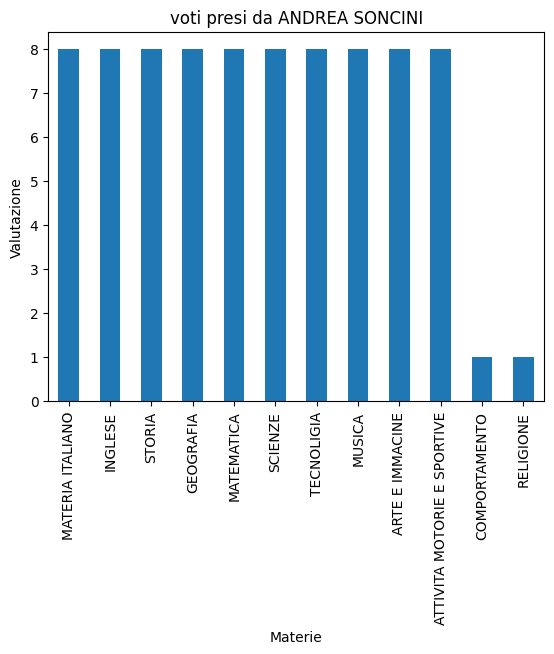

In [71]:
from matplotlib import pyplot as plt
df.loc['valutazione'].plot.bar()
plt.title(f"voti presi da {pagella.nome_alunno}")
plt.ylabel("Valutazione")
plt.xlabel("Materie")